### 1. Predecir el valor del dolar utilizando una red neuronal

Resolver el problema de predecir el valor del dólar, que se planteó en el capítulo
anterior, utilizando una red neuronal. Describir las diferencias entre un modelo de
entrenamiento y el otro

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def limpiar_y_convertir_a_float(df, columnas):
    for columna in columnas:
        df[columna] = df[columna].str.replace('.', '').str.replace(',', '.').astype(float)
    return df

bancolombia_df = pd.read_csv('Datos históricos BIC (1).csv')
ecopetrol_df = pd.read_csv('Datos históricos ECO (2).csv')
petroleo_df = pd.read_csv('Datos históricos Futuros petróleo Brent.csv')
tasa_cambio_df = pd.read_csv('Tasa_de_Cambio_Representativa_del__Mercado_-Historico_20240404 (1).csv')

columnas_para_convertir = ['Último', 'Apertura', 'Máximo', 'Mínimo'] 

bancolombia_df = limpiar_y_convertir_a_float(bancolombia_df, columnas_para_convertir)
ecopetrol_df = limpiar_y_convertir_a_float(ecopetrol_df, columnas_para_convertir)
petroleo_df = limpiar_y_convertir_a_float(petroleo_df, columnas_para_convertir)

bancolombia_df['Fecha'] = pd.to_datetime(bancolombia_df['Fecha'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')
ecopetrol_df['Fecha'] = pd.to_datetime(ecopetrol_df['Fecha'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')
petroleo_df['Fecha'] = pd.to_datetime(petroleo_df['Fecha'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')
tasa_cambio_df['Fecha'] = pd.to_datetime(tasa_cambio_df['VIGENCIADESDE'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

bancolombia_precios = bancolombia_df[['Fecha', 'Último']].rename(columns={'Último': 'Precio_Bancolombia'})
ecopetrol_precios = ecopetrol_df[['Fecha', 'Último']].rename(columns={'Último': 'Precio_Ecopetrol'})
petroleo_precios = petroleo_df[['Fecha', 'Último']].rename(columns={'Último': 'Precio_Petroleo'})
tasa_cambio = tasa_cambio_df[['Fecha', 'VALOR']].rename(columns={'VALOR': 'Tasa_Cambio'})

datos_combinados = pd.merge(bancolombia_precios, ecopetrol_precios, on='Fecha', how='outer')
datos_combinados = pd.merge(datos_combinados, petroleo_precios, on='Fecha', how='outer')
datos_combinados = pd.merge(datos_combinados, tasa_cambio, on='Fecha', how='outer')

datos_combinados = datos_combinados.sort_values('Fecha')



datos_completos = datos_combinados.interpolate().dropna()

X = datos_completos[['Precio_Bancolombia', 'Precio_Ecopetrol', 'Precio_Petroleo']]
y = datos_completos['Tasa_Cambio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_model = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42, max_iter=500))
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, R^2: {r2}, RMSE: {rmse}')


C:\Users\dmriv\AppData\Local\Temp\ipykernel_2984\179312154.py:48: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  datos_completos = datos_combinados.interpolate().dropna()


MSE: 76677.19990005113, R^2: 0.8954941716314369, RMSE: 276.9064822282987


c:\Users\dmriv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE (Error Cuadrático Medio): 76,677.20. Un valor más bajo indica un mejor ajuste.

R² (Coeficiente de Determinación): 0.895. Esta es una métrica clave que indica cuánta variabilidad de tus datos puede ser explicada por el modelo.valor de 0.895 sugiere que el modelo explica aproximadamente el 89.5% de la variabilidad, lo cual es bastante bueno.

RMSE (Raíz del Error Cuadrático Medio): 276.91. Esta métrica ofrece una medida de la magnitud del error, proporcionando una idea de cuán grandes son los errores en términos de las unidades originales de los datos

In [2]:
pip install tensorflow

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB ? eta 0:00:00
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.6/377.1 MB 11.5 MB/s eta 0:00:33
   ---------------------------------------- 1.0/377.1 MB 11.0 MB/s eta 0:00:35
   ---------------------------------------- 1.2/377.1 MB 8.6 MB/s eta 0:00:44
   ------------

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'C:/Users/dmriv/Documents/GitHub/IAminibots/fruits-360/Training'
test_data_dir = 'C:/Users/dmriv/Documents/GitHub/IAminibots/fruits-360/Test'

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(27, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size)

Found 14101 images belonging to 27 classes.
Found 4717 images belonging to 27 classes.
Epoch 1/10


c:\Users\dmriv\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


440/440 ━━━━━━━━━━━━━━━━━━━━ 142s 319ms/step - accuracy: 0.7259 - loss: 0.9157 - val_accuracy: 0.9071 - val_loss: 0.3061
Epoch 2/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 139us/step - accuracy: 0.9688 - loss: 0.1252 - val_accuracy: 0.9231 - val_loss: 0.2052
Epoch 3/10


c:\Users\dmriv\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


440/440 ━━━━━━━━━━━━━━━━━━━━ 93s 211ms/step - accuracy: 0.9931 - loss: 0.0245 - val_accuracy: 0.9354 - val_loss: 0.2083
Epoch 4/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 1.0000 - loss: 8.7652e-04 - val_accuracy: 1.0000 - val_loss: 0.0403
Epoch 5/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 91s 208ms/step - accuracy: 0.9952 - loss: 0.0173 - val_accuracy: 0.9332 - val_loss: 0.2763
Epoch 6/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 1.0000 - loss: 2.0878e-04 - val_accuracy: 0.9231 - val_loss: 0.1369
Epoch 7/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 96s 219ms/step - accuracy: 1.0000 - loss: 1.4928e-04 - val_accuracy: 0.9430 - val_loss: 0.2349
Epoch 8/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 1.0000 - loss: 7.5997e-06 - val_accuracy: 1.0000 - val_loss: 4.7003e-04
Epoch 9/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 99s 225ms/step - accuracy: 1.0000 - loss: 3.6063e-05 - val_accuracy: 0.9462 - val_loss: 0.2333
Epoch 10/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 1.0000 - l

In [9]:
model.save('fruit_classifier_model.keras')

In [10]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 27)             │        13,851 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,399,379 (39.67 MB)

 Trainable params: 3,466,459 (13.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,932,920 (26.45 MB)

In [ ]:
test_dir = 'C:/Users/dmriv/Documents/GitHub/IAminibots/fruits-360/Test'


In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np


model = load_model('fruit_classifier_model.keras')

def prepare_image(image_path):
    img = load_img(image_path, target_size=(150, 150))  
    img_array = img_to_array(img)  
    img_array = img_array / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array

image_path = 'C:/Users/dmriv/Documents/GitHub/IAminibots/fruits-360/Test/Banana/14_100.jpg'  
prepared_img = prepare_image(image_path)

predictions = model.predict(prepared_img)

predicted_class = np.argmax(predictions, axis=1)

class_names = [
    'Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2',
    'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1',
    'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1',
    'Apple Red Yellow 2', 'Banana', 'Banana Lady Finger', 'Banana Red',
    'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser',
    'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams', 'Strawberry',
    'Strawberry Wedge'
]
 
predicted_class_name = class_names[predicted_class[0]]

print(f"Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class: Banana


### 3. Predeccion de cancer de seno. 


- classification problem

Predicts breast cancer.

- taken from PROBEN1

References:

Lutz Prechelt, Proben1: A Set of Neural Network Benchmark Problems and Benchmarking Rules, 1994

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the datasets
training_data_path = 'training_data_2024_04_05_09_51_24.csv' # Update this path
validation_data_path = 'validation_data_2024_04_05_09_51_35.csv' # Update this path
test_data_path = 'test_data_2024_04_05_09_51_41.csv' # Update this path

training_data = pd.read_csv(training_data_path)
validation_data = pd.read_csv(validation_data_path)
test_data = pd.read_csv(test_data_path)

# Ensure data is numeric
training_data = training_data.apply(pd.to_numeric, errors='coerce')
validation_data = validation_data.apply(pd.to_numeric, errors='coerce')
test_data = test_data.apply(pd.to_numeric, errors='coerce')

# Preprocess the data
def preprocess_data(data):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

X_train, y_train = preprocess_data(training_data)
X_val, y_val = preprocess_data(validation_data)
X_test, _ = preprocess_data(test_data)  # No labels for test data

# Define the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_val, y_val))

# Predict on test data
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Save the predictions to a CSV file
pd.DataFrame(predictions, columns=['Prediction']).to_csv('breast_cancer_predictions.csv', index=False)

print("Model training complete. Predictions saved to 'breast_cancer_predictions.csv'.")


ValueError: Found array with 0 feature(s) (shape=(349, 0)) while a minimum of 1 is required by StandardScaler.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the training data
train_data = pd.read_csv('training_data_2024_04_05_09_51_24.csv', header=None, sep='\s+')

# Load the validation data
val_data = pd.read_csv('validation_data_2024_04_05_09_51_35.csv', header=None, sep='\s+')

# Load the test data
test_data = pd.read_csv('test_data_2024_04_05_09_51_41.csv', header=None, sep='\s+')

# Combine the data into a single DataFrame
data = pd.concat([train_data, val_data, test_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dmriv\AppData\Local\Temp\ipykernel_17416\2894946197.py:9: SyntaxWarning: invalid escape sequence '\s'
  train_data = pd.read_csv('training_data_2024_04_05_09_51_24.csv', header=None, sep='\s+')
C:\Users\dmriv\AppData\Local\Temp\ipykernel_17416\2894946197.py:12: SyntaxWarning: invalid escape sequence '\s'
  val_data = pd.read_csv('validation_data_2024_04_05_09_51_35.csv', header=None, sep='\s+')
C:\Users\dmriv\AppData\Local\Temp\ipykernel_17416\2894946197.py:15: SyntaxWarning: invalid escape sequence '\s'
  test_data = pd.read_csv('test_data_2024_04_05_09_51_41.csv', header=None, sep='\s+')
c:\Users\dmriv\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.8061 - loss: 0.4892 
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9700 - loss: 0.0886
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9755 - loss: 0.0499
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9741 - loss: 0.0565
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.9748 - loss: 0.0643
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9777 - loss: 0.0641
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9759 - loss: 0.0631
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9784 - loss: 0.0636
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9802 - loss: 0.0519
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9780 - loss: 0.0593
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9850 - loss: 0.0465
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/ste

### 4. Prediccion de lluvia



In [25]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/294.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [29]:
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [31]:
lengths = data["Date"].str.len()
lengths.value_counts()

Date
10    145460
Name: count, dtype: int64

In [32]:
data['Date']= pd.to_datetime(data["Date"])
data['year'] = data.Date.dt.year


def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


In [33]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [34]:

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [35]:

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

C:\Users\dmriv\AppData\Local\Temp\ipykernel_17416\1733177674.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


In [36]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [37]:

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [38]:

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

C:\Users\dmriv\AppData\Local\Temp\ipykernel_17416\1421615967.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)
C:\Users\dmriv\AppData\Local\Temp\ipykernel_17416\1421615967.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [39]:
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [40]:

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


C:\Users\dmriv\AppData\Local\Temp\ipykernel_17416\2961525613.py:5: UserWarning: 
The palette list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


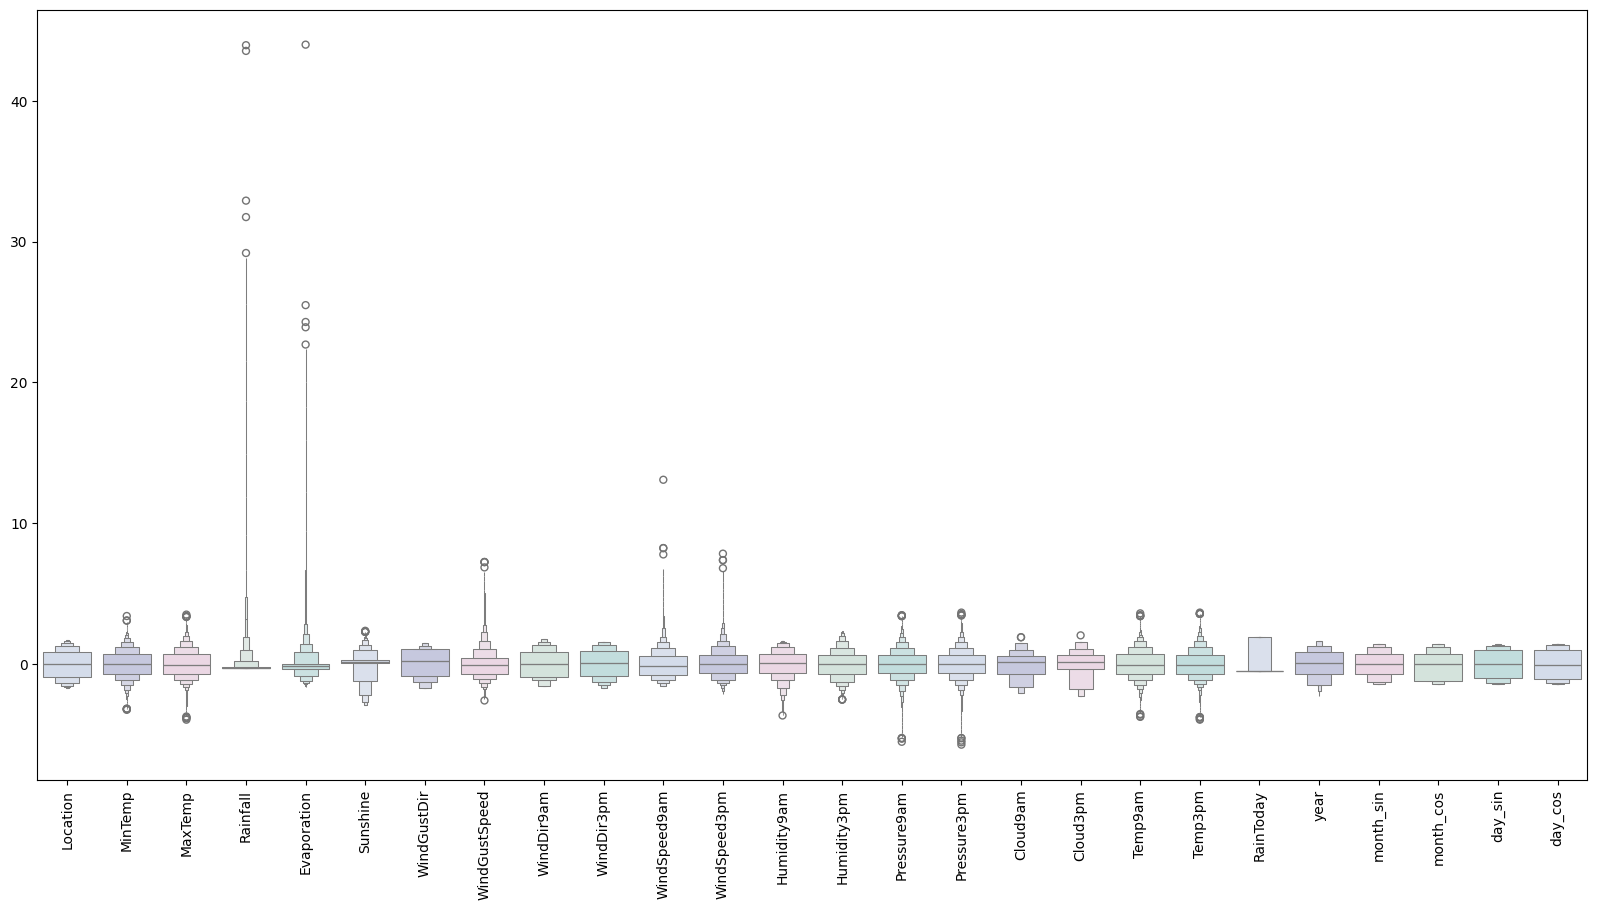

In [41]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [42]:
features["RainTomorrow"] = target


features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 27)

In [43]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

In [44]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150


c:\Users\dmriv\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2551/2551 ━━━━━━━━━━━━━━━━━━━━ 3s 729us/step - accuracy: 0.7835 - loss: 0.5582 - val_accuracy: 0.7860 - val_loss: 0.3940
Epoch 2/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 2s 698us/step - accuracy: 0.7845 - loss: 0.4177 - val_accuracy: 0.7860 - val_loss: 0.3874
Epoch 3/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step - accuracy: 0.7848 - loss: 0.4104 - val_accuracy: 0.7860 - val_loss: 0.3848
Epoch 4/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step - accuracy: 0.7864 - loss: 0.4103 - val_accuracy: 0.7860 - val_loss: 0.3830
Epoch 5/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step - accuracy: 0.7813 - loss: 0.4125 - val_accuracy: 0.7860 - val_loss: 0.3818
Epoch 6/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step - accuracy: 0.7861 - loss: 0.4033 - val_accuracy: 0.7860 - val_loss: 0.3808
Epoch 7/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step - accuracy: 0.7850 - loss: 0.4069 - val_accuracy: 0.7860 - val_loss: 0.3795
Epoch 8/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 2s 684us/step - accuracy: 0.8041 - los

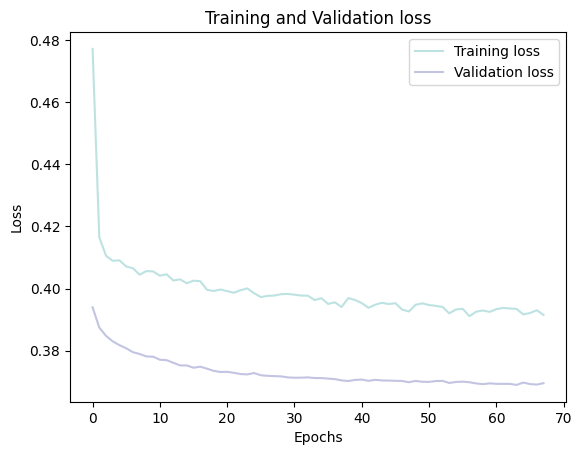

In [45]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [46]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

798/798 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


<Axes: >

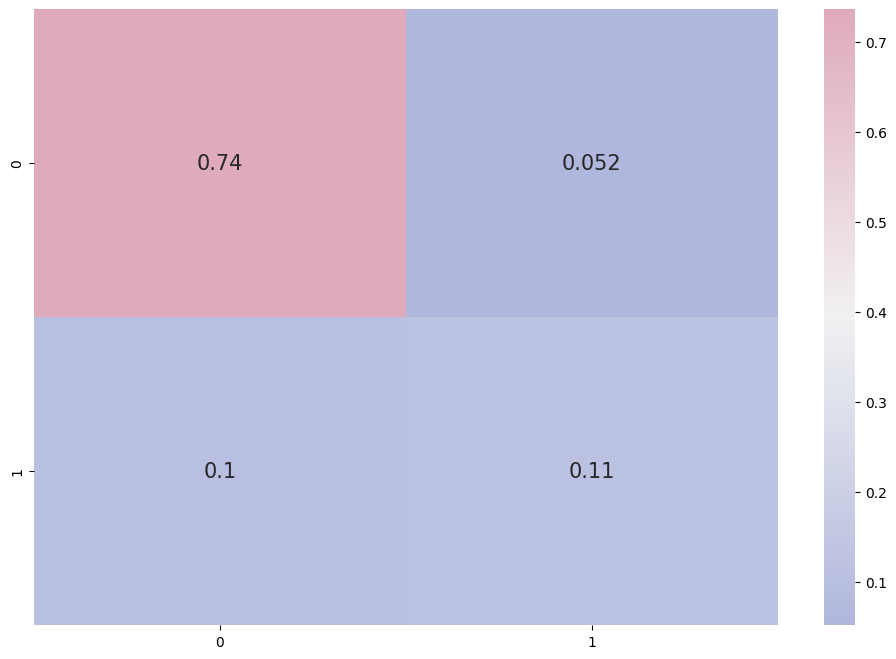

In [48]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     20110
           1       0.68      0.53      0.60      5398

    accuracy                           0.85     25508
   macro avg       0.78      0.73      0.75     25508
weighted avg       0.84      0.85      0.84     25508

